## An unusual ransom (part 3)

#### Can you find the last keyword hidden in that dataset?

- After grouping data by `mystery_feature`, scatter plotting each sub-group reveals frames from an animation.
- Timestep is therefore `mystery_feature`.
- Fastest way to see the entire thing is to concatenate + pad along x-axis, then finally scatter-plot the result.

**Solution: `crush`**

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set()

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/hyperc54/data-puzzles-assets/master/visualisation/chal1/chal_visu_1_q3_data.csv')
print(df.shape)
df.head()

(5600, 3)


,x,y,mystery_feature
0,31.950806,-77.874664,77
1,22.000000,-36.022263,104
2,28.500002,-66.546692,10
3,25.923157,-69.759354,24
4,30.458435,-88.715622,96


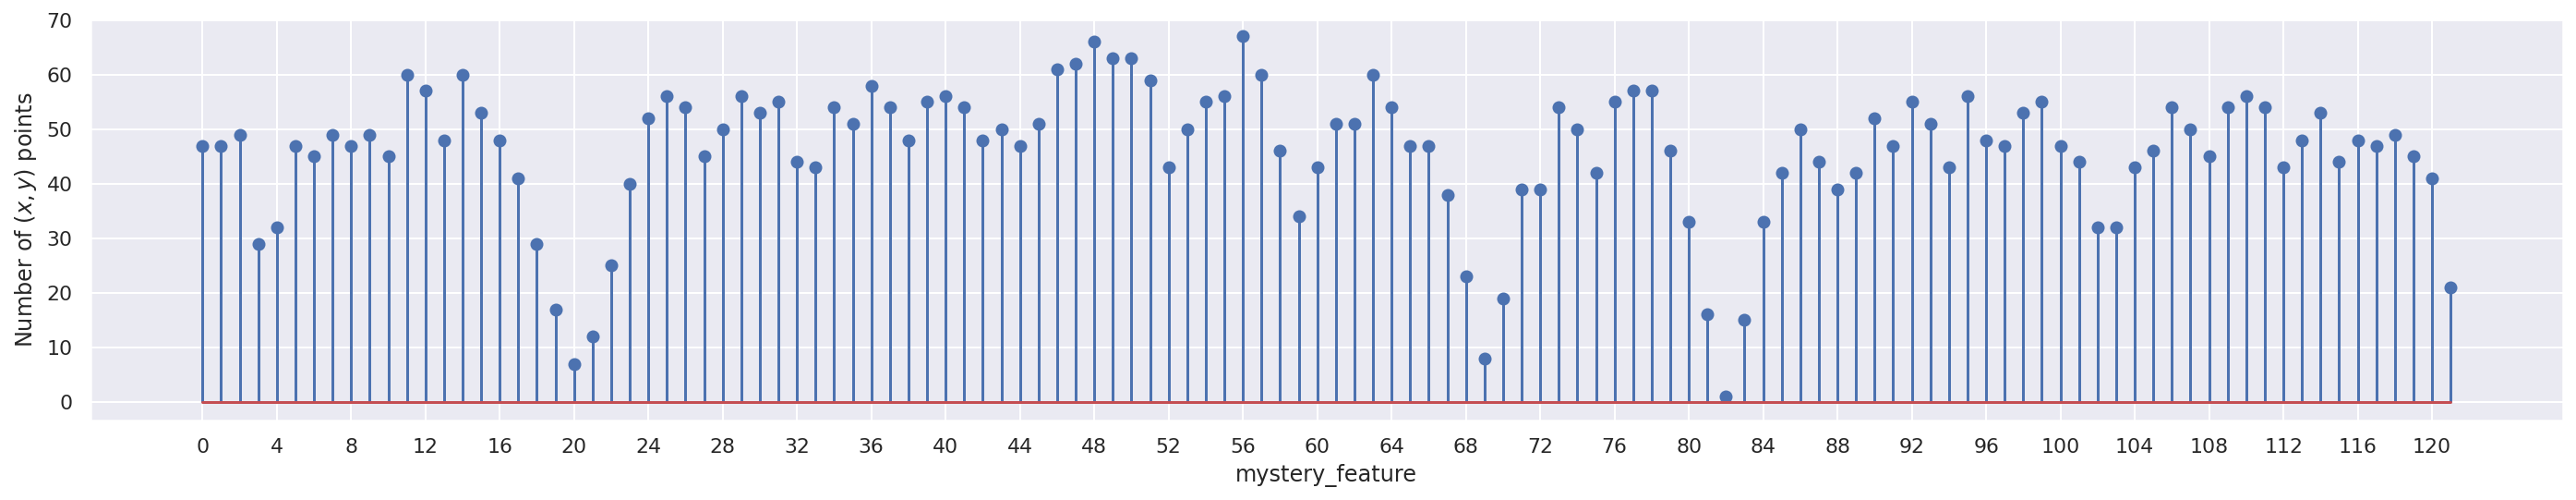

In [3]:
ns, fs = np.unique(df.mystery_feature, return_counts=True)
plt.figure(figsize=(24, 4))
plt.stem(ns, fs)
plt.xticks(np.arange(0, max(ns), 4))
plt.xlabel('mystery_feature')
plt.ylabel('Number of $(x, y)$ points')
pass

In [4]:
df.sort_values(by='mystery_feature', inplace=True)
df.head()

,x,y,mystery_feature
1872,23.919998,-44.337234,0
3939,35.199997,-46.790680,0
805,32.746567,-89.339355,0
5353,35.199997,-21.789505,0
2717,35.199997,-26.789734,0


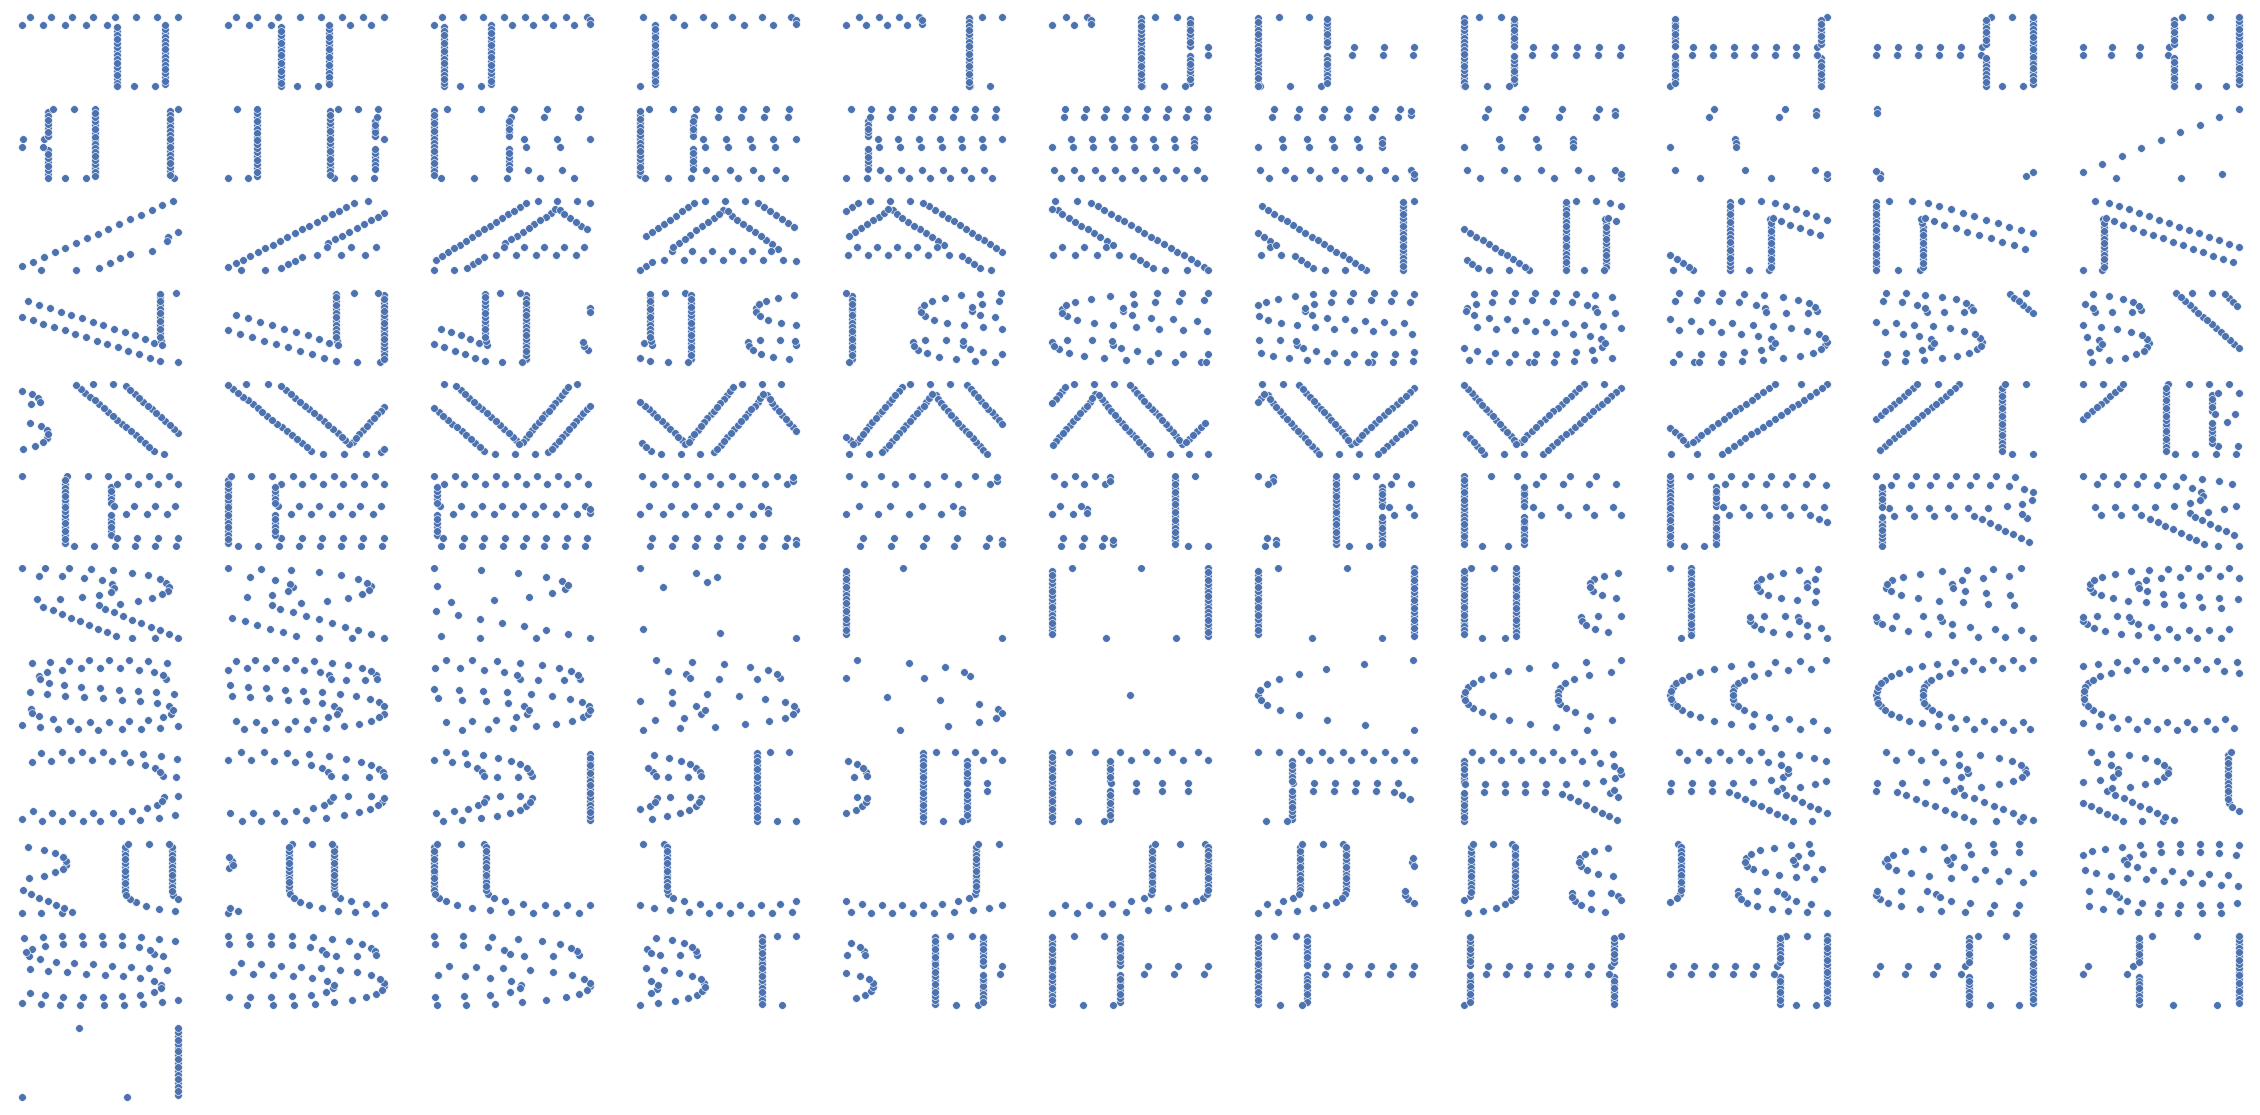

In [5]:
plt.figure(figsize=(20, 10))

for i in df.mystery_feature.unique():
    d = df[df.mystery_feature == i]
    plt.subplot(12, 11, i+1)
    plt.axis('off')
    plt.grid(False)
    sns.scatterplot(x=d.x, y=d.y, s=15)

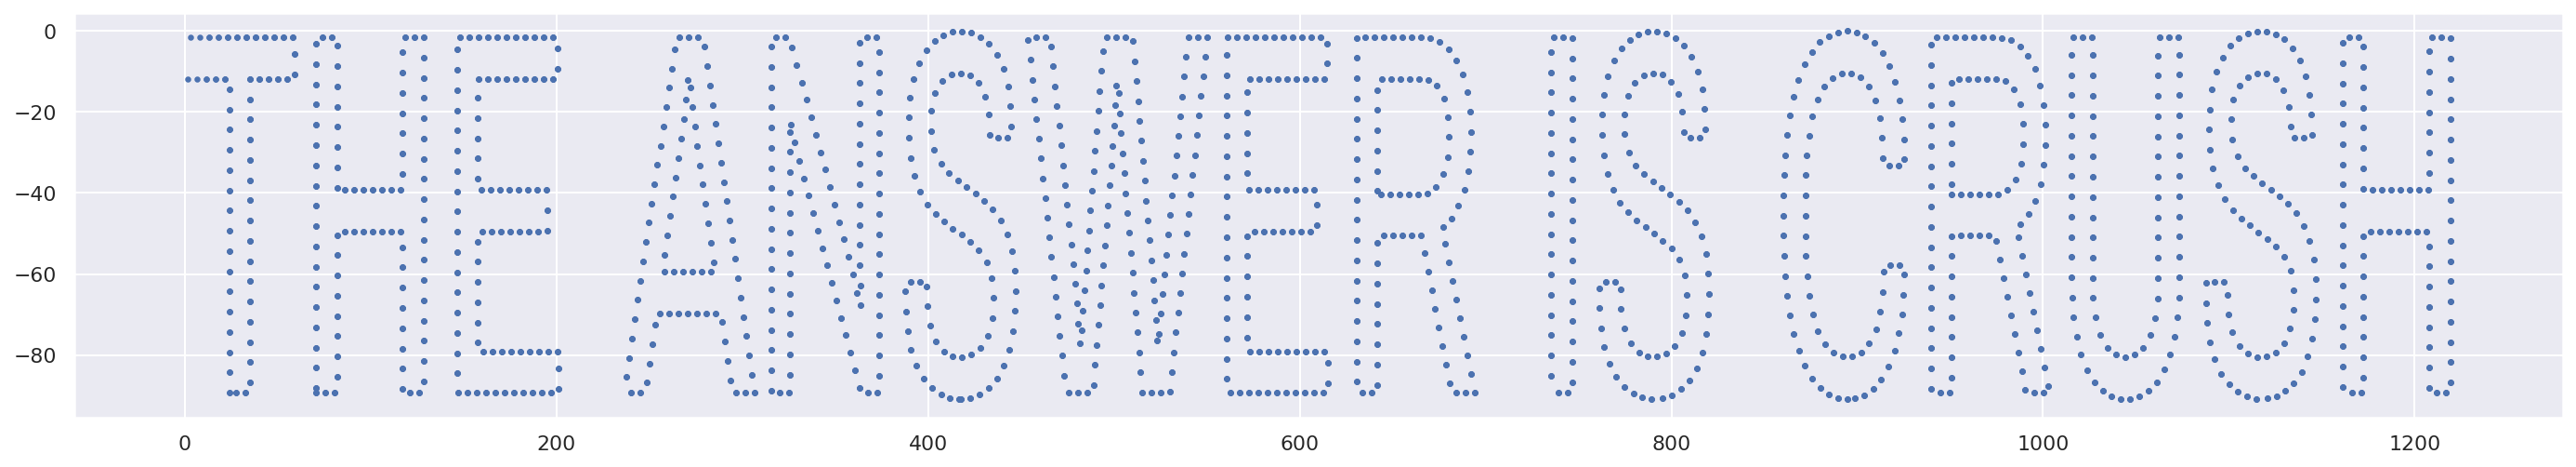

In [6]:
plt.figure(figsize=(24, 4))
xs = []
width = 10
for i in df.mystery_feature.unique():
    xs.extend(df[df.mystery_feature == i].x + i * width)
plt.scatter(xs, df.y, s=5)